# Name : Aditya Giradkar
# Roll No : 10
# GR No : 11810629
## Assignment 3 - Data Preprocessing

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sem VI/DS_lab/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


###Checking and removing duplicate records

In [ ]:
column_array = df.columns
print(df.duplicated().sum())
print(np.where(df.duplicated()==True))

24
(array([ 8453,  8645, 12202, 14346, 15603, 17344, 19067, 20388, 20507,
       22783, 22934, 23276, 23660, 23720, 23827, 26738, 27133, 28796,
       29051, 29334, 29604, 31060, 32065, 32419]),)


In [ ]:
df.drop_duplicates(subset =column_array, keep = 'last', inplace = True)
df.shape

(32537, 15)

### Replacing "?" with NaN

In [ ]:
df = df.replace('?',np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Checking the Missing data

In [ ]:
df.isna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df[df['workclass'].isna()]


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,NaN,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,NaN,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32534,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32543,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


### Counting the Missing Values

In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

### Droping the Missing Data

In [ ]:
dropdf = df.dropna()
dropdf.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
print(df.shape)
print(dropdf.shape)

(32537, 15)
(30139, 15)


### Fill in Missing values with Mode

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df.iloc[:,:])
df.iloc[:,:] = imputer.transform(df.iloc[:,:])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Transform the non-numeric columns into numeric
### Lable Encoding

In [ ]:
df = df.rename(columns = {'native.country': 'nativecountry'}, inplace = False)
print(df.nativecountry.value_counts())
print("\nNo. of unique values : ",df.nativecountry.value_counts().count())

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
l1.fit(df['workclass'])
df.workclass = l1.transform(df.workclass)
l1.fit(df['education'])
df.education = l1.transform(df.education)
l1.fit(df['race'])
df.race = l1.transform(df.race)
l1.fit(df['sex'])
df.sex = l1.transform(df.sex)
df

,age,workclass,fnlwgt,education,education.num,maritalstatus,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,nativecountry,income
0,90,3,77053,11,9,Widowed,Prof-specialty,Not-in-family,4,0,0,4356,40,United-States,<=50K
1,82,3,132870,11,9,Widowed,Exec-managerial,Not-in-family,4,0,0,4356,18,United-States,<=50K
2,66,3,186061,15,10,Widowed,Prof-specialty,Unmarried,2,0,0,4356,40,United-States,<=50K
3,54,3,140359,5,4,Divorced,Machine-op-inspct,Unmarried,4,0,0,3900,40,United-States,<=50K
4,41,3,264663,15,10,Separated,Prof-specialty,Own-child,4,0,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,Never-married,Protective-serv,Not-in-family,4,1,0,0,40,United-States,<=50K
32557,27,3,257302,7,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,<=50K
32558,40,3,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,>50K
32559,58,3,151910,11,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,<=50K


### Repeat Steps

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Sem VI/DS_lab/adult.csv")
dff = dff.replace('?',np.nan)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dff.iloc[:,:])
dff.iloc[:,:] = imputer.transform(dff.iloc[:,:])
dff = dff.rename(columns = {'fnlwgt': 'salary'})
del dff['income']
# dff = dff.loc[:, ['age', 'salary']]
dff

,age,workclass,salary,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


### One Hot Encoding

In [ ]:
dff = dff.iloc[:, :]
ddf = pd.get_dummies(dff) 
dff

,age,workclass,salary,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [ ]:
pd.get_dummies(dff).shape

(32561, 107)

##Feature Scaling

###Range of hour of work in week and age 

In [ ]:
print('Hours per week range',min(dff['hours.per.week']),'-',max(dff['hours.per.week']))
print('Age range',min(dff.age),'-',max(dff.age))

Hours per week reange 1 - 99
Age range 17 - 90


age          90
salary    77053
Name: 0, dtype: int64
age           41
salary    264663
Name: 4, dtype: int64


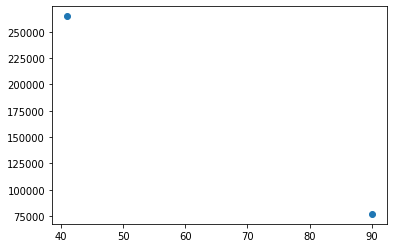

In [ ]:
dff = dff.loc[:, ['age', 'salary']]
x1=dff.iloc[0,0:2]
x2=dff.iloc[4,0:2] 
print(x1)
print(x2)
x=[x1[0],x2[0]]
y=[x1[1],x2[1]]
plt.scatter(x, y)
plt.show()

In [ ]:
plt.boxplot(dff['age'])


In [ ]:
plt.boxplot(dff['salary'])

In [ ]:
Agediff=(x1[0]-x2[0])**2
print("square of Age difference : ", Agediff)
Saldiff=(x1[1]-x2[1])**2
print("square of Salary difference : ", Saldiff)
e_dist=np.sqrt(Agediff+Saldiff)
print("euclidean distance : ", e_dist)


square of Age difference :  2401
square of Salary difference :  35197512100
euclidean distance :  187610.00639891252


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dff.iloc[:, 0:2] = sc.fit_transform(dff.iloc[:, 0:2])
dff

,age,salary
0,3.769612,-1.067997
1,3.183112,-0.539169
2,2.010110,-0.035220
3,1.130359,-0.468215
4,0.177296,0.709482
...,...,...
32556,-1.215643,1.140460
32557,-0.849080,0.639741
32558,0.103983,-0.335433
32559,1.423610,-0.358777


In [ ]:
x1=dff.iloc[0,0:2]
x2=dff.iloc[4,0:2] 
Agediff=(x1[0]-x2[0])**2
print("square of Age difference : ", Agediff)
Saldiff=(x1[1]-x2[1])**2
print("square of Salary difference : ", Saldiff)
e_dist=np.sqrt(Agediff+Saldiff)
print("euclidean distance : ", e_dist)

square of Age difference :  12.904738637758937
square of Salary difference :  3.159432004990375
euclidean distance :  4.008013303714112
